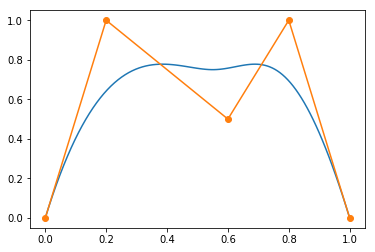

In [2]:
import numpy as np
import matplotlib.pyplot as plt

p = 3 #order of the polynomial

n = 5 #number of basis vector

knot_Vect = np.array([0,0,0,0,0.5,1,1,1,1])

control_pts = np.array([(0,0),(0.2,1),(0.6,0.5),(0.8,1),(1,0)])

def knot_span(knot_Vect):
    k_span = [knot_Vect[0]]
    k_idx = []
    for i in range(len(knot_Vect)-1):
        if knot_Vect[i] != knot_Vect[i+1]:
            k_span.append(knot_Vect[i+1])
            k_idx.append(i) 
    
    return k_span, k_idx

def deBoorAlgo(k, zeta, knot_Vect, control_pts, p):
    """
    k : index of knot interval that has x
    zeta : parametric variable
    knot_Vect : knot vector
    control_pts : control points
    p : degree of p splines
    
    """
    
    d = [control_pts[j+k-p] for j in range(0,p+1)]
    for r in range(1, p+1):
        for j in range(p, r-1, -1):
            alpha = (zeta - knot_Vect[j+k-p]) / (knot_Vect[j+1+k-r] - knot_Vect[j+k-p])
            d[j] = (1.0 - alpha) * d[j-1] + alpha * d[j]
    
    return d[p]
    
k_span, k_idx = knot_span(knot_Vect)

zeta = np.linspace(0,1,100)

Curve = []

for i in range(len(zeta)):
    for j in range(len(k_span)-1):
        if zeta[i] < k_span[j+1]:
            k = k_idx[j]
            break
    S = deBoorAlgo(k, zeta[i], knot_Vect, control_pts, p)
    Curve.append(S)


x = []
y = []

cx = []
cy = []

for i in range(len(Curve)):
    x.append(Curve[i][0])
    y.append(Curve[i][1])

for i in range(len(control_pts)):
    cx.append(control_pts[i][0])
    cy.append(control_pts[i][1])


plt.plot(x,y)
plt.plot(cx,cy, marker='o')

plt.show()
